## Investigating models' performance with max peak height as feature

In [1]:
# Load data
from src.models.utils import load_data
import glob
file_list = glob.glob('{0}/*'.format("../data/processed/unlabeled"))

for f in file_list:
    if not "bkg" in f:
        data_x = load_data(f)

In [7]:
# Train model and evaluate which feature set is better
from src.models.train_model import train_model

inertia_nc = []
for nc in range(1, 65):
    model = train_model(data_x, n_clusters=nc)
    inertia_nc.append(model.inertia_)

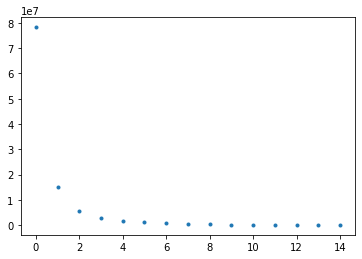

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(inertia_nc[:15], '.')

Text(0.5, 1.0, 'Analysis of max peak wl in unlabeled data')

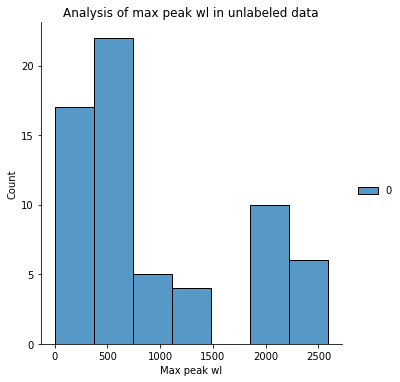

In [15]:
# Shows features used collected
sns.displot(model.cluster_centers_)
plt.xlabel("Max peak wl")
plt.title("Analysis of max peak wl in unlabeled data")

Using the "elbow technique", the optimal number of clusters is 2. This is definetely not useful for us.
Intuitively, the clusters defined by this matter are around 500 wl and 2200. Let's check the code...

In [17]:
model = train_model(data_x, 2)
model.cluster_centers_

array([[ 344.27522936],
       [2053.66666667]])

which confirms my hypothesis. Need more than just max peak heigh to do meaningful clustering.
